## Aykırı Değerleri Bulma
Bu laboratuvar çalışmasında, temizlenmiş bir veri kümesiyle çalışarak keşifsel veri analizi (EDA) yapacaksınız.

Bu laboratuvar çalışmasında, temel değişkenlerin dağılımını inceleyecek ve aykırı değerleri belirlemeye odaklanacaksınız.


Bu laboratuvar çalışmasında şunları yapacaksınız:

-Veri kümesindeki temel değişkenlerin dağılımını analiz edin.

-İstatistiksel yöntemler kullanarak aykırı değerleri belirleyin ve kaldırın.

-İlgili istatistiksel ve korelasyon analizlerini gerçekleştirin.

Gerekli kütüphaneleri kurun ve içe aktarın.

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 156.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 155.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 123.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 124.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 143.0 MB/s eta 0:00:00


## Adım 1: Veri Setini Yükleyin ve İnceleyin
Veri setini bir DataFrame'e yükleyin ve verilerin yapısını inceleyin.

In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head(5)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


## Adım 2: Sektör Dağılımını Grafikle Gösterin
Katılımcıların farklı sektörlere nasıl dağıldığını inceleyin.

Katılımcıların sektörlere göre dağılımını görselleştirmek için bir çubuk grafik çizin.

Önemli eğilimleri vurgulayın.

/tmp/ipykernel_327/3322133450.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=industry_counts_all.index, x=industry_counts_all.values, palette='magma')


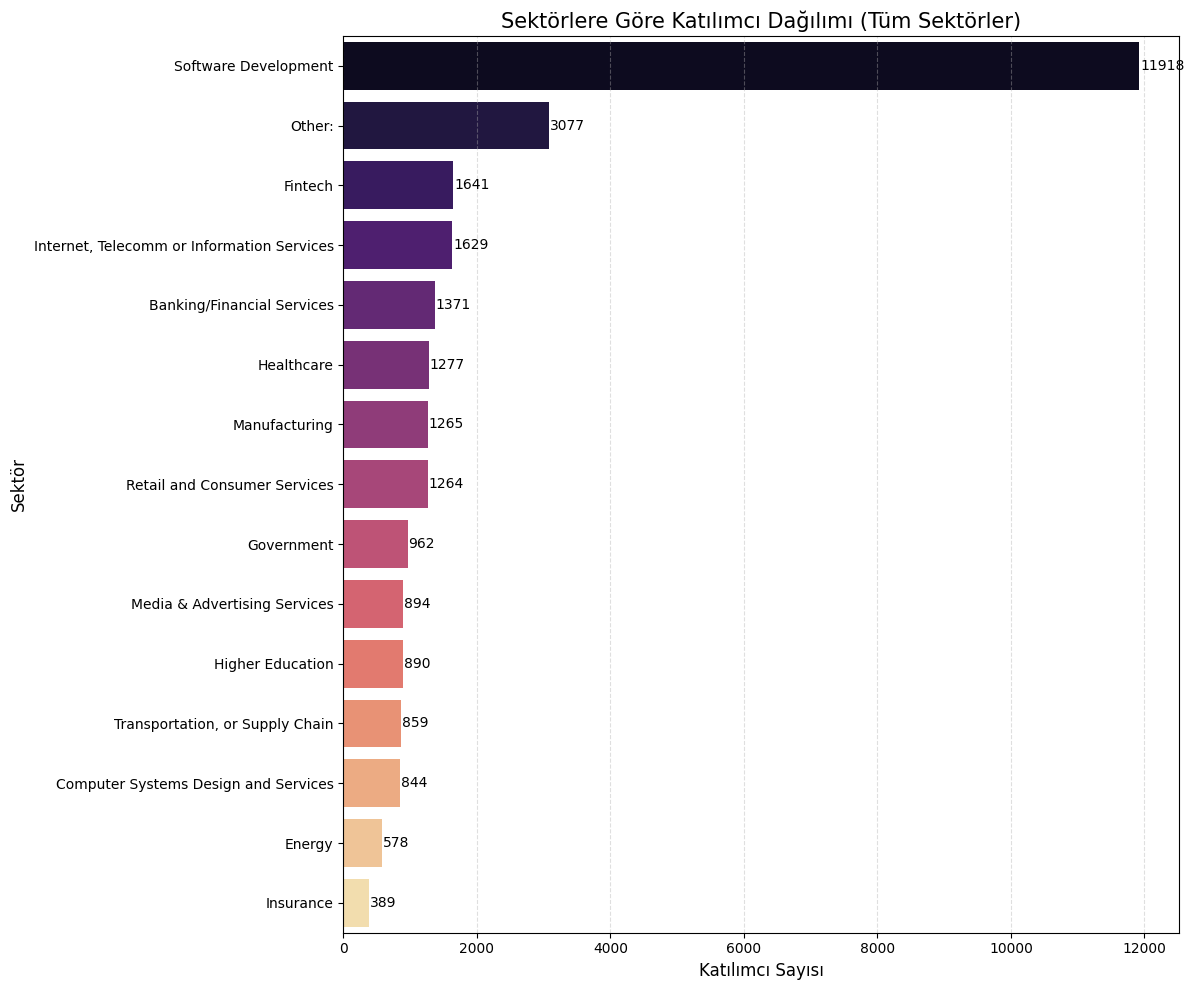

In [3]:
# 1. Tüm sektörleri sıralı şekilde alalım (Küçükten büyüğe sıralarsak en az olanlar en üstte görünür)
industry_counts_all = df['Industry'].value_counts().sort_values(ascending=False)

# 2. Görselleştirme: Tüm Sektörleri Kapsayan Çubuk Grafik
plt.figure(figsize=(12, 10)) # Boyutu biraz büyüttük ki hepsi sığsın
sns.barplot(y=industry_counts_all.index, x=industry_counts_all.values, palette='magma')

plt.title('Sektörlere Göre Katılımcı Dağılımı (Tüm Sektörler)', fontsize=15)
plt.xlabel('Katılımcı Sayısı', fontsize=12)
plt.ylabel('Sektör', fontsize=12)

# Her çubuğun yanına tam sayıyı yazalım
for i, v in enumerate(industry_counts_all.values):
    plt.text(v + 15, i, str(v), va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# 3. Adım: Yüksek Ücretli Aykırı Değerleri Belirleme
Son derece yüksek yıllık ücrete sahip katılımcıları belirleyin.

ConvertedCompYearly için temel istatistikleri (ortalama, medyan ve standart sapma) hesaplayın.

Belirlenen bir eşiği aşan ücret değerlerini belirleyin (örneğin, ortalamanın 3 standart sapma üstü).

In [4]:
# 1. Temel İstatistikleri Hesaplayalım
mean_val = df['ConvertedCompYearly'].mean()
median_val = df['ConvertedCompYearly'].median()
std_val = df['ConvertedCompYearly'].std()

print(f"--- Maaş İstatistikleri ---")
print(f"Ortalama Maaş: {mean_val:,.2f} USD")
print(f"Medyan Maaş: {median_val:,.2f} USD")
print(f"Standart Sapma: {std_val:,.2f} USD")

# 2. Eşik Değerini Belirleyelim (Mean + 3*Std)
# İstatistikte bu sınırın ötesi 'Extreme Outlier' kabul edilir
threshold = mean_val + (3 * std_val)   #ortalamanın 3 standart sapma üstü
print(f"\nBelirlenen Aykırı Değer Eşiği (3 Std): {threshold:,.2f} USD")

# 3. Bu eşiği aşan katılımcıları bulalım
high_earners = df[df['ConvertedCompYearly'] > threshold]

print(f"Eşiği Aşan Kişi Sayısı: {len(high_earners)}")
print(f"Veri Setindeki Oranı: %{(len(high_earners) / df['ConvertedCompYearly'].count()) * 100:.2f}")

# 4. En yüksek 5 maaşı görelim (Hatalı giriş var mı kontrolü)
print("\nEn Yüksek 5 Maaş Kaydı:")
print(high_earners['ConvertedCompYearly'].sort_values(ascending=False).head(5))

--- Maaş İstatistikleri ---
Ortalama Maaş: 86,155.29 USD
Medyan Maaş: 65,000.00 USD
Standart Sapma: 186,756.97 USD

Belirlenen Aykırı Değer Eşiği (3 Std): 646,426.21 USD
Eşiği Aşan Kişi Sayısı: 89
Veri Setindeki Oranı: %0.38

En Yüksek 5 Maaş Kaydı:
15837    16256603.0
12723    13818022.0
28379     9000000.0
17593     6340564.0
17672     4936778.0
Name: ConvertedCompYearly, dtype: float64


#""" Toplanda 89 kişi eşiği aşıyor .  Standart sapmanın ortalamadan büyük olması, verinin inanılmaz derecede geniş bir alana yayıldığını ve çok uç değerler içerdiğini gösterir. Normalde bir veri setinde standart sapmanın ortalamanın yarısından az olması beklenir. Buradaki durum tamamen o 16 milyon dolarlık "süper uç" değerlerden kaynaklanıyor."""

## 4. Adım: Tazminatta Aykırı Değerleri Tespit Etme
IQR yöntemini kullanarak ConvertedCompYearly sütunundaki aykırı değerleri belirleyin.

Çeyrekler Arası Aralığı (IQR) hesaplayın.

Aykırı değerler için üst ve alt sınırları belirleyin.

Aykırı değerleri sayın ve bir kutu grafiği kullanarak görselleştirin.

1. Çeyreklik (Q1): 32,712.00 USD
3. Çeyreklik (Q3): 107,971.50 USD
IQR Değeri: 75,259.50 USD
------------------------------
Alt Sınır (Lower Bound): -80,177.25 USD
Üst Sınır (Upper Bound): 220,860.75 USD
IQR ile Tespit Edilen Aykırı Değer Sayısı: 978


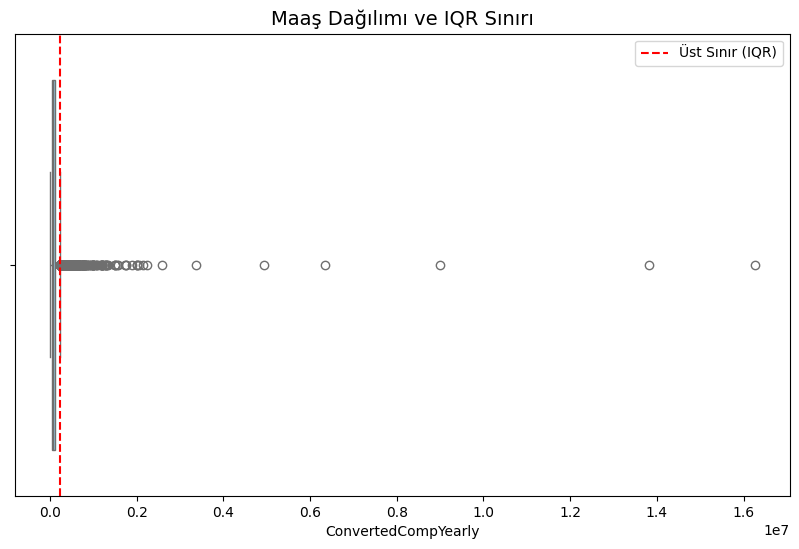

In [6]:
# 1. Çeyreklikleri hesaplayalım (NaN değerleri otomatik elenir)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

# 2. IQR (Interquartile Range) hesaplama
IQR = Q3 - Q1

# 3. Sınırları belirleme (Genel kabul görmüş 1.5 katsayısı ile)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 4. Aykırı değerleri belirleme
outliers_iqr = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

print(f"1. Çeyreklik (Q1): {Q1:,.2f} USD")
print(f"3. Çeyreklik (Q3): {Q3:,.2f} USD")
print(f"IQR Değeri: {IQR:,.2f} USD")
print("-" * 30)
print(f"Alt Sınır (Lower Bound): {lower_bound:,.2f} USD")
print(f"Üst Sınır (Upper Bound): {upper_bound:,.2f} USD")
print(f"IQR ile Tespit Edilen Aykırı Değer Sayısı: {len(outliers_iqr)}")

# 5. Görselleştirme: Kutu Grafiği (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedCompYearly'], color='skyblue')
plt.axvline(upper_bound, color='red', linestyle='--', label='Üst Sınır (IQR)')
plt.title('Maaş Dağılımı ve IQR Sınırı', fontsize=14)
plt.legend()
plt.show()

# Adım 5: Aykırı Değerleri Kaldırın ve Yeni Bir Veri Çerçevesi Oluşturun
Veri kümesinden aykırı değerleri kaldırın.

ConvertedCompYearly tablosundaki aykırı değerlere sahip satırları hariç tutarak yeni bir Veri Çerçevesi oluşturun.

Yeni Veri Çerçevesinin boyutunu doğrulayın.

In [8]:
# 1. IQR sınırlarına göre filtreleme yaparak yeni bir DataFrame oluşturalım
# Alt sınır negatif çıktığı için (0) baz alıyoruz, üst sınır ise IQR'dan gelen upper_bound
df_final = df[(df['ConvertedCompYearly'] >= 0) & (df['ConvertedCompYearly'] <= upper_bound)].copy()

# 2. Veri Çerçevesinin boyutunu doğrulayalım
print(f"Orijinal Veri Seti Satır Sayısı: {len(df)}")
print(f"Aykırı Değerler Çıkarıldıktan Sonra Satır Sayısı: {len(df_final)}")
print(f"Toplamda {len(df) - len(df_final)} satır (aykırı değer ve NaN) temizlendi.")

# 3. İstatistiksel 'İyileşmeyi' Kontrol Edelim
print("\n--- Temizlenmiş Veri İstatistikleri ---")
print(f"Yeni Ortalama: {df_final['ConvertedCompYearly'].mean():,.2f} USD")
print(f"Yeni Medyan: {df_final['ConvertedCompYearly'].median():,.2f} USD")
print(f"Yeni Maksimum Değer: {df_final['ConvertedCompYearly'].max():,.2f} USD")

Orijinal Veri Seti Satır Sayısı: 65437
Aykırı Değerler Çıkarıldıktan Sonra Satır Sayısı: 22457
Toplamda 42980 satır (aykırı değer ve NaN) temizlendi.

--- Temizlenmiş Veri İstatistikleri ---
Yeni Ortalama: 71,347.20 USD
Yeni Medyan: 63,694.00 USD
Yeni Maksimum Değer: 220,207.00 USD


"""
Kodun içindeki .copy() komutu çok kritiktir. Eğer bunu kullanmazsak, Pandas bize bir "SettingWithCopyWarning" uyarısı verebilir. Bu komutla, df_final'in orijinal df'den tamamen bağımsız, yepyeni bir "temiz sayfa" olmasını sağlıyoruz."""

# Adım 6: Korelasyon Analizi
Yaş (dönüştürülmüş) ile diğer sayısal sütunlar arasındaki korelasyonu analiz edin.

Yaş sütununu yaklaşık sayısal değerlere eşleyin.

Yaş ile diğer sayısal değişkenler arasındaki korelasyonları hesaplayın.

Korelasyon matrisini görselleştirin.

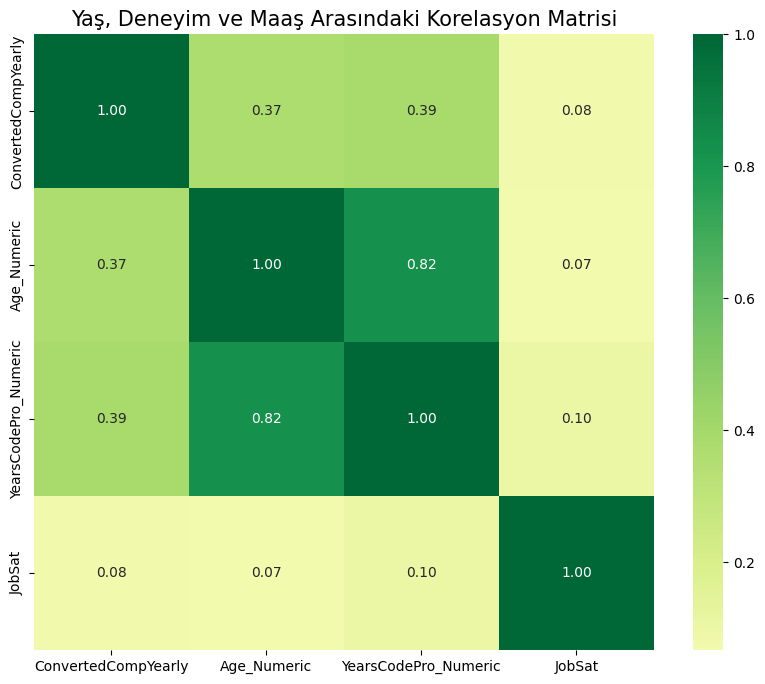

Korelasyon Katsayıları:
                      ConvertedCompYearly  Age_Numeric  YearsCodePro_Numeric  \
ConvertedCompYearly              1.000000     0.369924              0.387209   
Age_Numeric                      0.369924     1.000000              0.821805   
YearsCodePro_Numeric             0.387209     0.821805              1.000000   
JobSat                           0.075244     0.067081              0.100208   

                        JobSat  
ConvertedCompYearly   0.075244  
Age_Numeric           0.067081  
YearsCodePro_Numeric  0.100208  
JobSat                1.000000  


In [10]:
# 1. Yaş kategorilerini sayısal değerlere eşleyelim (Mapping)
# Her grubun orta noktasını temsil eden bir sayı seçiyoruz
age_map = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

# Yeni bir sayısal yaş sütunu oluşturalım
df_final['Age_Numeric'] = df_final['Age'].map(age_map)

# 2. YearsCodePro sütununu da sayısal hale getirelim (Eğer hala yapmadıysak)
# 'Less than 1 year' -> 0.5, 'More than 50 years' -> 51 gibi düzenlemeler yapılabilir
df_final['YearsCodePro_Numeric'] = pd.to_numeric(df_final['YearsCodePro'], errors='coerce')

# 3. Korelasyon Matrisini Hesaplayalım
# Maaş, Sayısal Yaş, Profesyonel Deneyim ve İş Memnuniyeti arasındaki bağa bakalım
corr_columns = ['ConvertedCompYearly', 'Age_Numeric', 'YearsCodePro_Numeric', 'JobSat']
corr_matrix = df_final[corr_columns].corr()

# 4. Görselleştirme: Isı Haritası (Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', center=0, fmt='.2f')

plt.title('Yaş, Deneyim ve Maaş Arasındaki Korelasyon Matrisi', fontsize=15)
plt.show()

print("Korelasyon Katsayıları:")
print(corr_matrix)